#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Exploratory Data Analysis`

#### Group 05:
- Karolina Rączkowska 20241250
- Michał Wójcik 20241255
- Hubert Kołomański 20241253
- Marek Rewoliński 20241452
- Christian Deluca 20241264  

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id="toc"> 

- [1. Reviews analysis](#P1)
- [2. Restuarants analysis](#P2)
</a>

In [215]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

[1. Reviews analysis](#P1)

In [216]:
reviews_raw = pd.read_csv('../data_hyderabad/10k_reviews.csv')
restaurants = pd.read_csv('../data_hyderabad/105_restaurants.csv')


In [217]:
reviews_raw.shape

(10000, 7)

In [218]:
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [219]:
reviews_raw["Rating"].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [220]:
reviews_raw = reviews_raw[reviews_raw["Rating"] != "Like"]

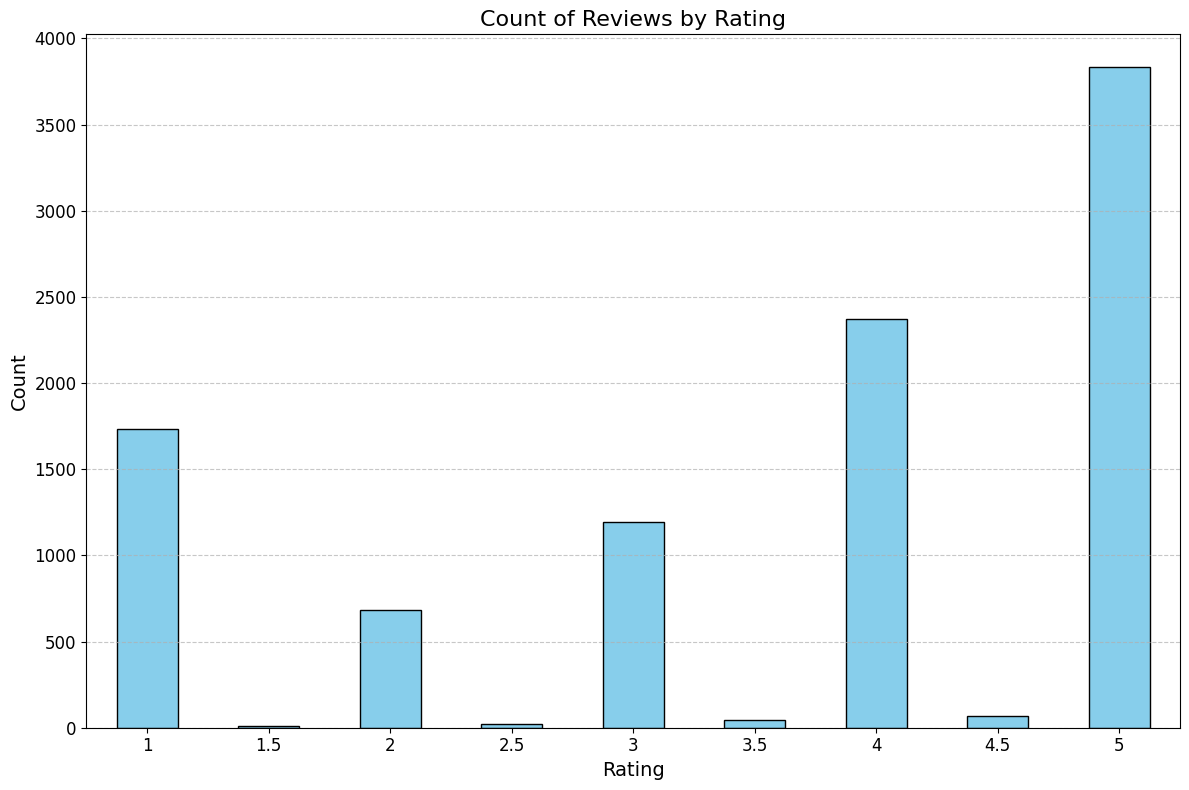

In [221]:
rating_count = reviews_raw.groupby("Rating")["Review"]

plt.figure(figsize=(12, 8))
ax = rating_count.size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by Rating', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [222]:
reviews_raw["Rating"] = reviews_raw["Rating"].astype(float)
reviews_raw["Time"] = pd.to_datetime(reviews_raw["Time"])

In [223]:
reviews_raw["Year"] = reviews_raw["Time"].dt.year
reviews_raw["Month"] = reviews_raw["Time"].dt.month

print(reviews_raw["Year"].value_counts().sort_index())

2016.0      43
2017.0     213
2018.0    4903
2019.0    4802
Name: Year, dtype: int64


In [224]:
print(reviews_raw["Month"].value_counts().sort_index())

1.0      652
2.0      719
3.0     1065
4.0     1247
5.0     1541
6.0      292
7.0     1331
8.0      677
9.0      645
10.0     629
11.0     569
12.0     594
Name: Month, dtype: int64


In [225]:
print(f"First review is from: {min(reviews_raw['Time'])} and last review is from: {max(reviews_raw['Time'])}")

First review is from: 2016-05-31 16:41:00 and last review is from: 2019-05-25 20:23:00


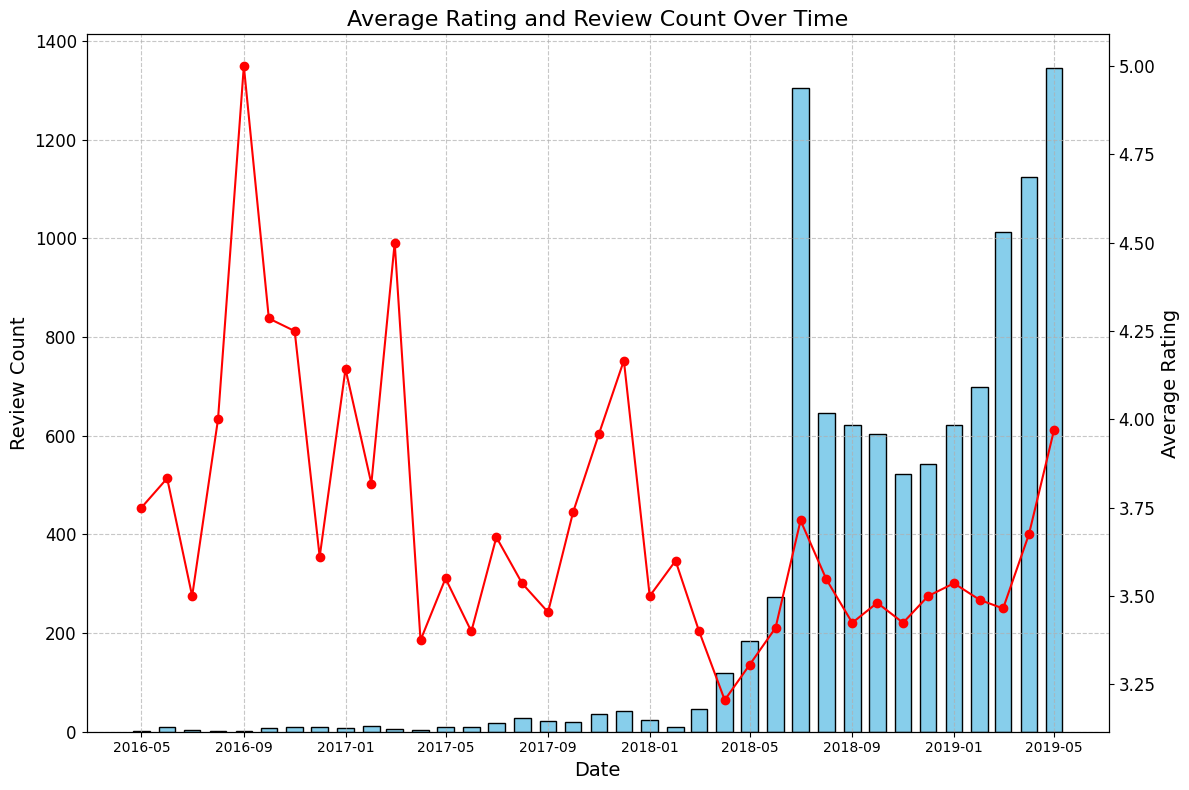

In [226]:
# Calculate average rating and review count over time
average_rating_time = reviews_raw.groupby(['Year', 'Month']).agg({'Rating': 'mean', 'Review': 'count'}).reset_index()
average_rating_time['Date'] = pd.to_datetime(average_rating_time[['Year', 'Month']].assign(DAY=1))

# Rename columns for clarity
average_rating_time.rename(columns={'Rating': 'Average_Rating', 'Review': 'Review_Count'}, inplace=True)

# Plot the combo chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for review count with increased width
ax1.bar(average_rating_time['Date'], average_rating_time['Review_Count'], width=20, color='skyblue', edgecolor='black', label='Review Count')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Review Count', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)

# Create a second y-axis for the average rating
ax2 = ax1.twinx()
ax2.plot(average_rating_time['Date'], average_rating_time['Average_Rating'], color='red', marker='o', linestyle='-', label='Average Rating')
ax2.set_ylabel('Average Rating', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

# Add title and grid
plt.title('Average Rating and Review Count Over Time', fontsize=16)
ax1.grid(axis='both', linestyle='--', alpha=0.7)
fig.tight_layout()

# Show plot
plt.show()


In [227]:
reviews_raw["Review_length"] = reviews_raw["Review"].apply(lambda x: len(str(x).split()))

In [228]:
#review rating by review length

rating_len = reviews_raw.groupby("Rating")["Review_length"].mean()
print(rating_len)

Rating
1.0     46.733141
1.5    117.111111
2.0     52.336257
2.5     73.210526
3.0     56.911148
3.5     83.893617
4.0     64.785082
4.5     63.971014
5.0     39.175365
Name: Review_length, dtype: float64


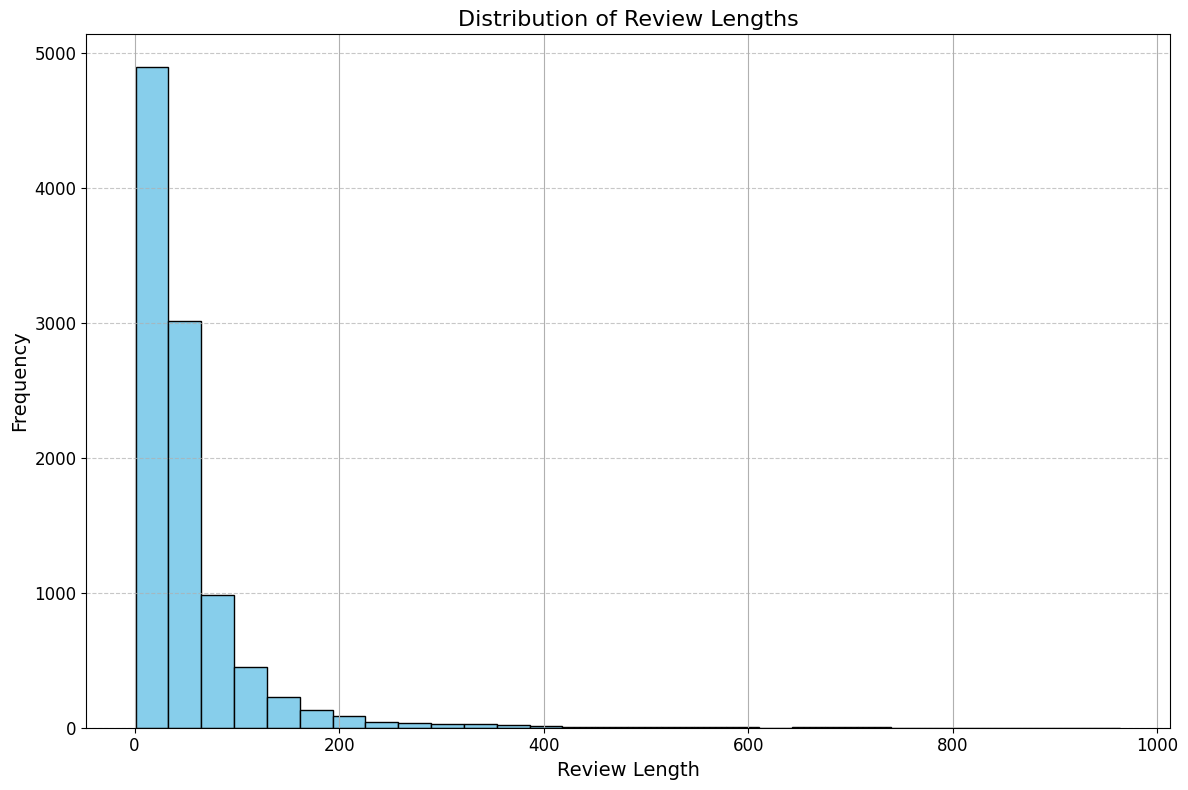

In [229]:
plt.figure(figsize=(12, 8))
reviews_raw["Review_length"].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


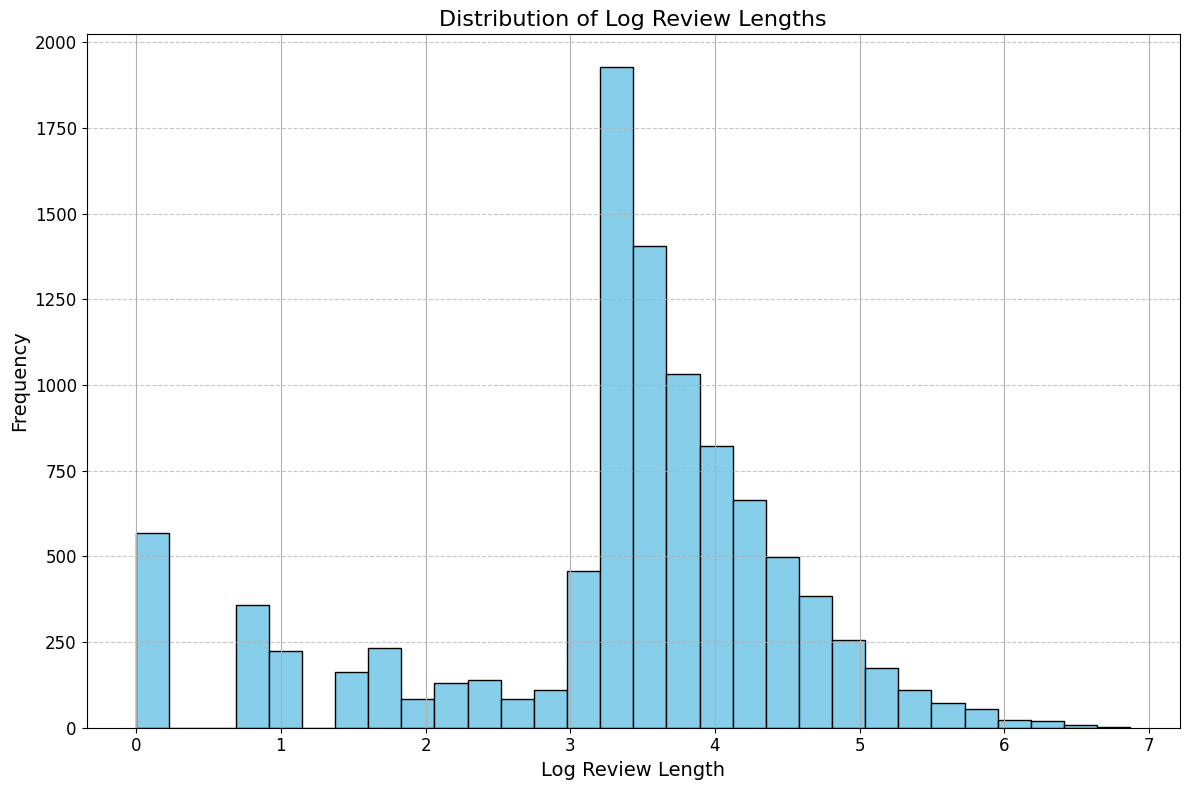

In [230]:
plt.figure(figsize=(12, 8))
log_review_length = np.log(reviews_raw["Review_length"])
log_review_length.hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Log Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Log Review Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [231]:
reviews_raw["Metadata"] = reviews_raw["Metadata"].fillna('0 Reviews')

reviews_raw["N_reviews"] = reviews_raw["Metadata"].apply(lambda x: int(str(x).split()[0].replace(',', '')))

In [232]:
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Reviewer       9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9999 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
 7   Year           9961 non-null   float64       
 8   Month          9961 non-null   float64       
 9   Review_length  9999 non-null   int64         
 10  N_reviews      9999 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 937.4+ KB


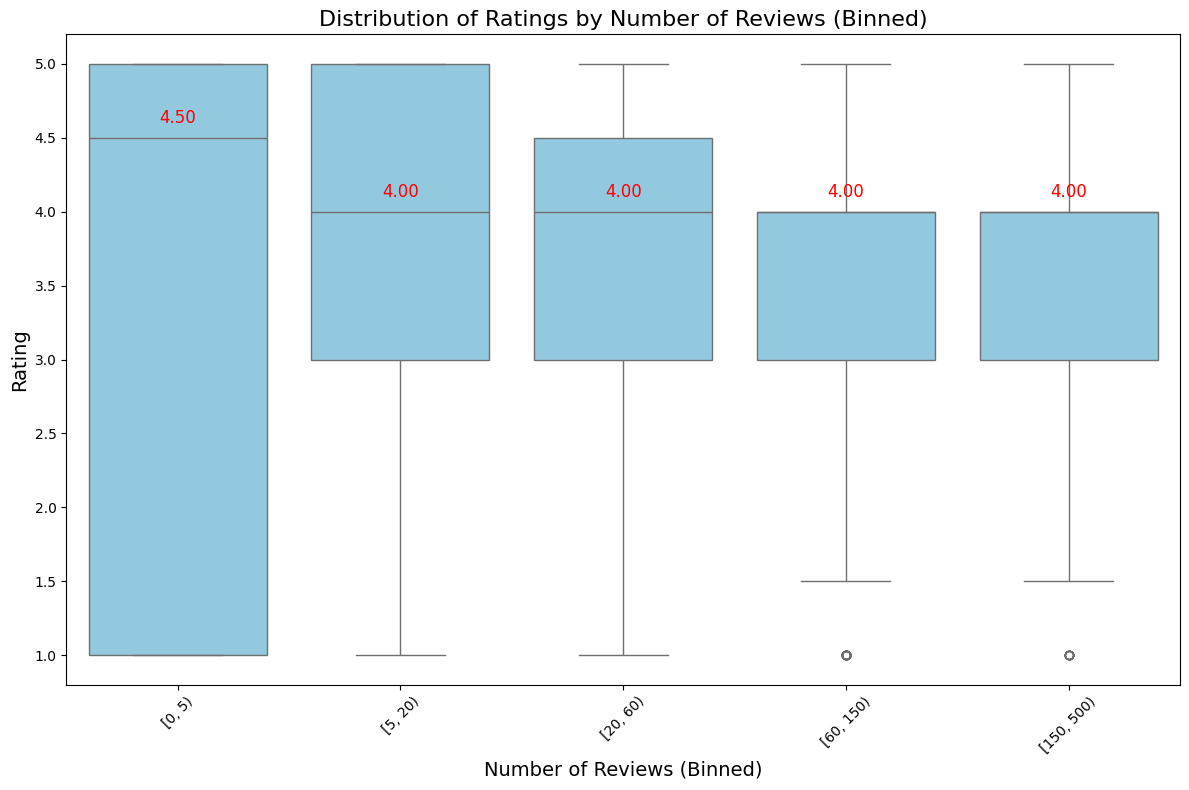

In [238]:
reviews_raw['N_reviews_bin'] = pd.cut(reviews_raw['N_reviews'], bins=[0, 5, 20, 60, 150, 500], right=False)
median_per_bin = reviews_raw.groupby('N_reviews_bin')['Rating'].median()

plt.figure(figsize=(12, 8))
sns.boxplot(x=reviews_raw['N_reviews_bin'], y=reviews_raw['Rating'], color='skyblue')

for idx, median in enumerate(median_per_bin):
    plt.text(idx, median + 0.1, f'{median:.2f}', color='red', ha='center', fontsize=12)

plt.title('Distribution of Ratings by Number of Reviews (Binned)', fontsize=16)
plt.xlabel('Number of Reviews (Binned)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [237]:
reviews_raw['N_reviews'] = reviews_raw['Metadata'].str.extract(r'(\d+) Review').fillna(0).astype(int)
reviews_raw['N_followers'] = reviews_raw['Metadata'].str.extract(r'(\d+) Follower').fillna(0).astype(int)

print(reviews_raw[['Metadata', 'N_reviews', 'N_followers']].head())


                  Metadata  N_reviews  N_followers
0   1 Review , 2 Followers          1            2
1  3 Reviews , 2 Followers          3            2
2  2 Reviews , 3 Followers          2            3
3    1 Review , 1 Follower          1            1
4  3 Reviews , 2 Followers          3            2


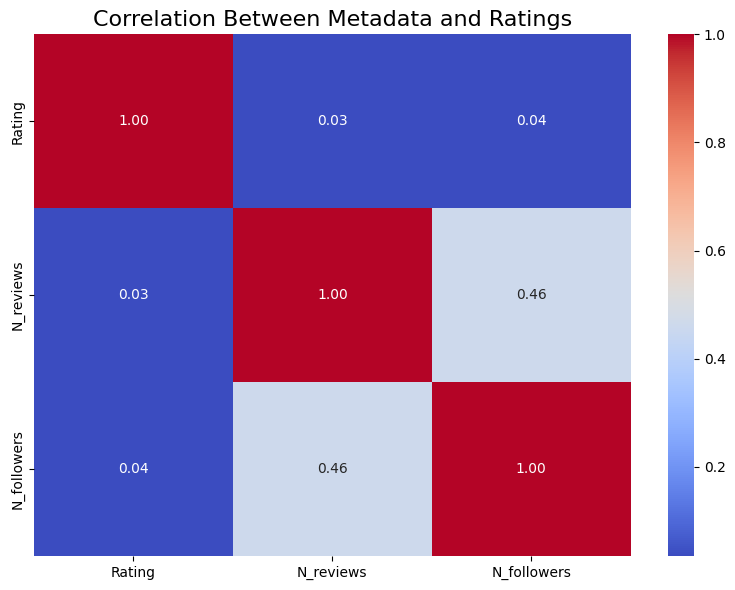

In [240]:
correlation_matrix = reviews_raw[['Rating', 'N_reviews', 'N_followers']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Metadata and Ratings', fontsize=16)
plt.tight_layout()
plt.show()


In [233]:
reviews_raw.describe()

,Rating,Pictures,Year,Month,Review_length,N_reviews
count,9961.000000,9999.000000,9961.000000,9961.000000,9999.000000,9999.000000
mean,3.601044,0.748575,2018.452063,6.017970,49.951995,23.900890
std,1.483461,2.570508,0.562496,3.159606,60.739068,50.542707
min,1.000000,0.000000,2016.000000,1.000000,1.000000,0.000000
25%,3.000000,0.000000,2018.000000,4.000000,24.000000,1.000000
50%,4.000000,0.000000,2018.000000,5.000000,34.000000,4.000000
75%,5.000000,0.000000,2019.000000,8.000000,58.000000,22.000000
max,5.000000,64.000000,2019.000000,12.000000,964.000000,1031.000000


[2. Restaurants analysis](#P2)

In [234]:
restaurants.shape

(105, 6)

In [235]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


North Indian     61
Chinese          43
Continental      21
Biryani          16
Fast Food        15
Asian            15
Italian          14
Desserts         13
South Indian      9
Bakery            7
Kebab             6
Cafe              6
Andhra            6
Mughlai           6
American          6
Salad             5
Burger            5
Mediterranean     5
Beverages         5
Momos             4
Seafood           4
European          4
Hyderabadi        4
Sushi             4
Thai              3
Modern Indian     2
Arabian           2
Ice Cream         2
Street Food       2
Japanese          2
Finger Food       2
BBQ               2
Pizza             1
North Eastern     1
Mithai            1
Indonesian        1
Juices            1
Wraps             1
Spanish           1
Mexican           1
Goan              1
Healthy Food      1
Lebanese          1
Malaysian         1
Name: Cuisines, dtype: int64


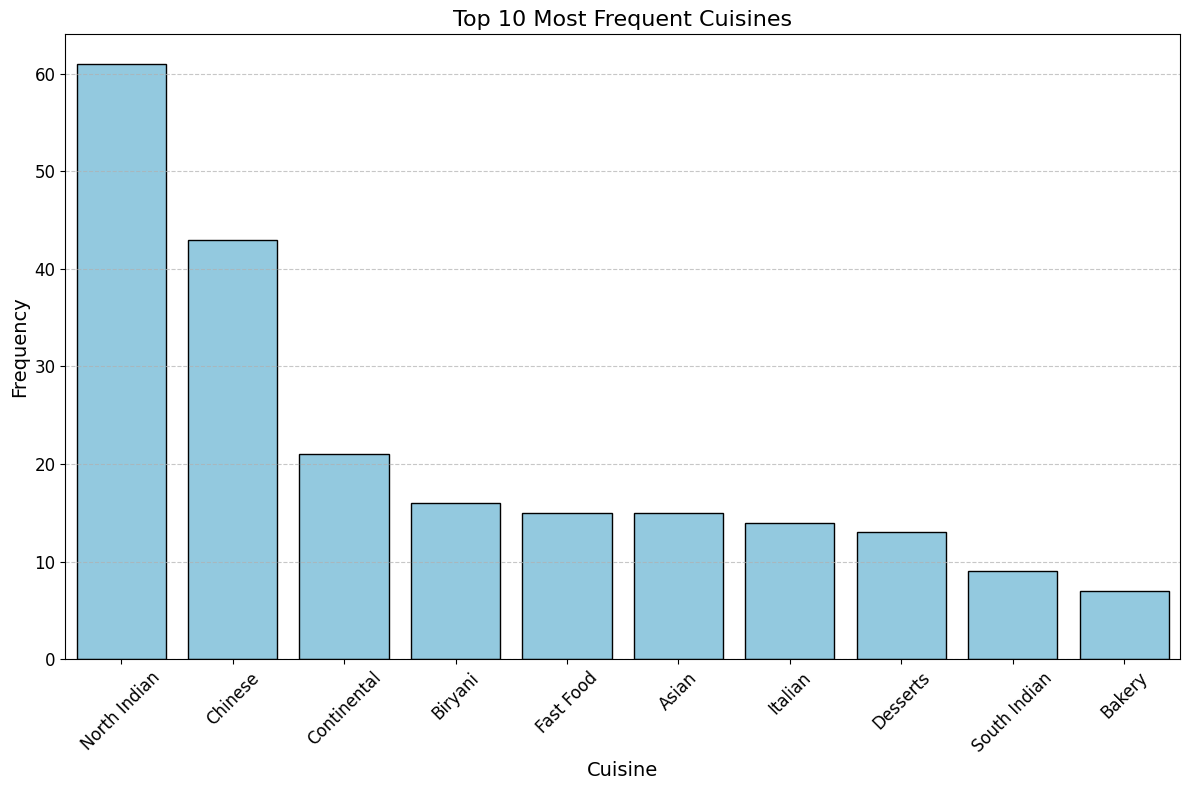

In [236]:
restaurants['Cuisines'] = restaurants['Cuisines'].astype(str)
restaurants['Cuisines'] = restaurants['Cuisines'].str.split(', ')
cuisine_counts = restaurants.explode('Cuisines')['Cuisines'].value_counts()
print(cuisine_counts)
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_counts.head(10).index, y=cuisine_counts.head(10).values, color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequent Cuisines', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Cuisine', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


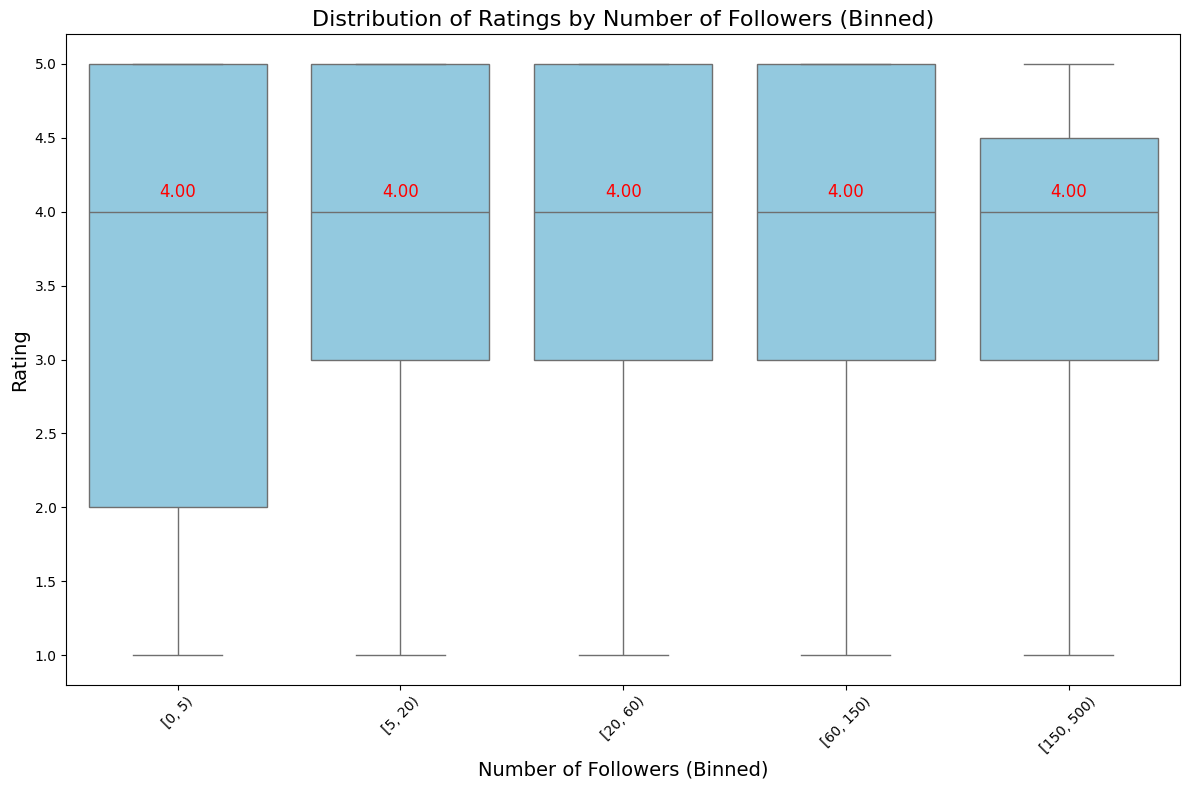

In [239]:
reviews_raw['N_followers_bin'] = pd.cut(reviews_raw['N_followers'], bins=[0, 5, 20, 60, 150, 500], right=False)
median_per_bin_followers = reviews_raw.groupby('N_followers_bin')['Rating'].median()

plt.figure(figsize=(12, 8))
sns.boxplot(x=reviews_raw['N_followers_bin'], y=reviews_raw['Rating'], color='skyblue')

for idx, median in enumerate(median_per_bin_followers):
    plt.text(idx, median + 0.1, f'{median:.2f}', color='red', ha='center', fontsize=12)

plt.title('Distribution of Ratings by Number of Followers (Binned)', fontsize=16)
plt.xlabel('Number of Followers (Binned)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [243]:
merged_data = reviews_raw.merge(restaurants, left_on='Restaurant', right_on='Name', how='inner')
merged_data = merged_data.drop(columns=['Links', 'Name'])



In [247]:
restaurant_ratings = merged_data.groupby('Restaurant')['Rating'].agg(['mean', 'median']).reset_index()
restaurant_ratings.columns = ['Restaurant', 'Average_Rating', 'Median_Rating']
restaurant_ratings.head(5)


,Restaurant,Average_Rating,Median_Rating
0,10 Downing Street,3.80,4.0
1,13 Dhaba,3.48,4.0
2,"3B's - Buddies, Bar & Barbecue",4.76,5.0
3,AB's - Absolute Barbecues,4.88,5.0
4,Absolute Sizzlers,3.62,4.0


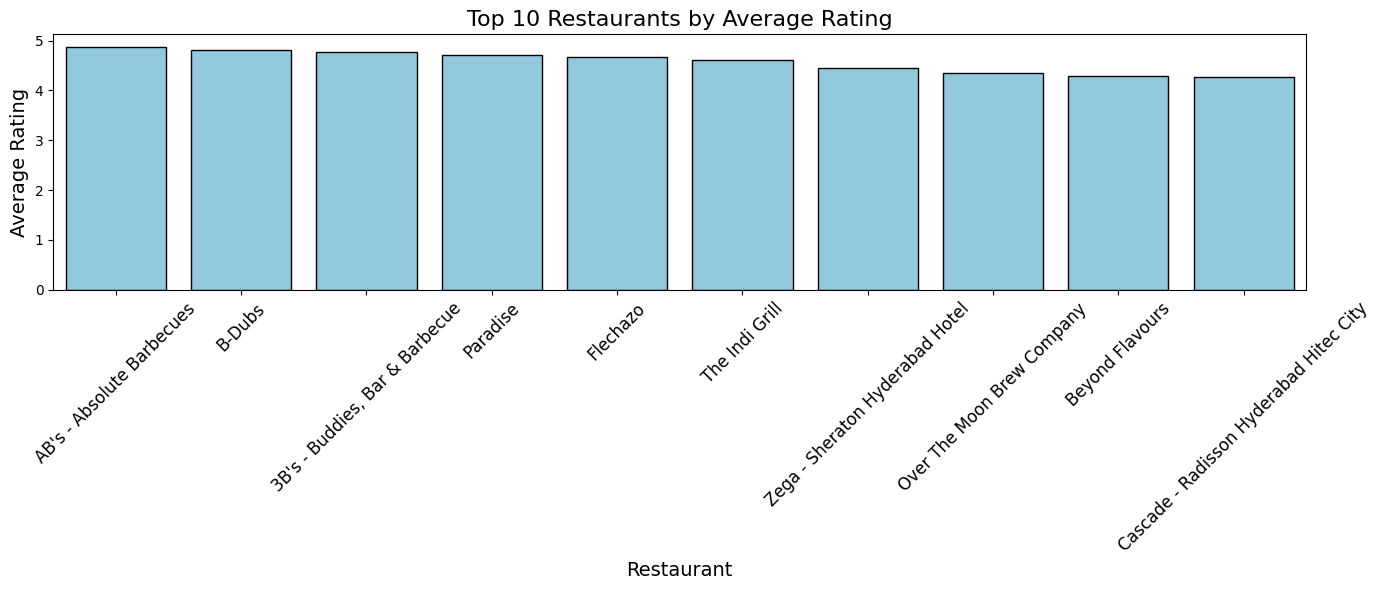

In [258]:
top_restaurants = restaurant_ratings.sort_values(by='Average_Rating', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x='Restaurant', y='Average_Rating', data=top_restaurants, color='skyblue', edgecolor='black')
plt.title('Top 10 Restaurants by Average Rating', fontsize=16)
plt.ylabel('Average Rating', fontsize=14)
plt.xlabel('Restaurant', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


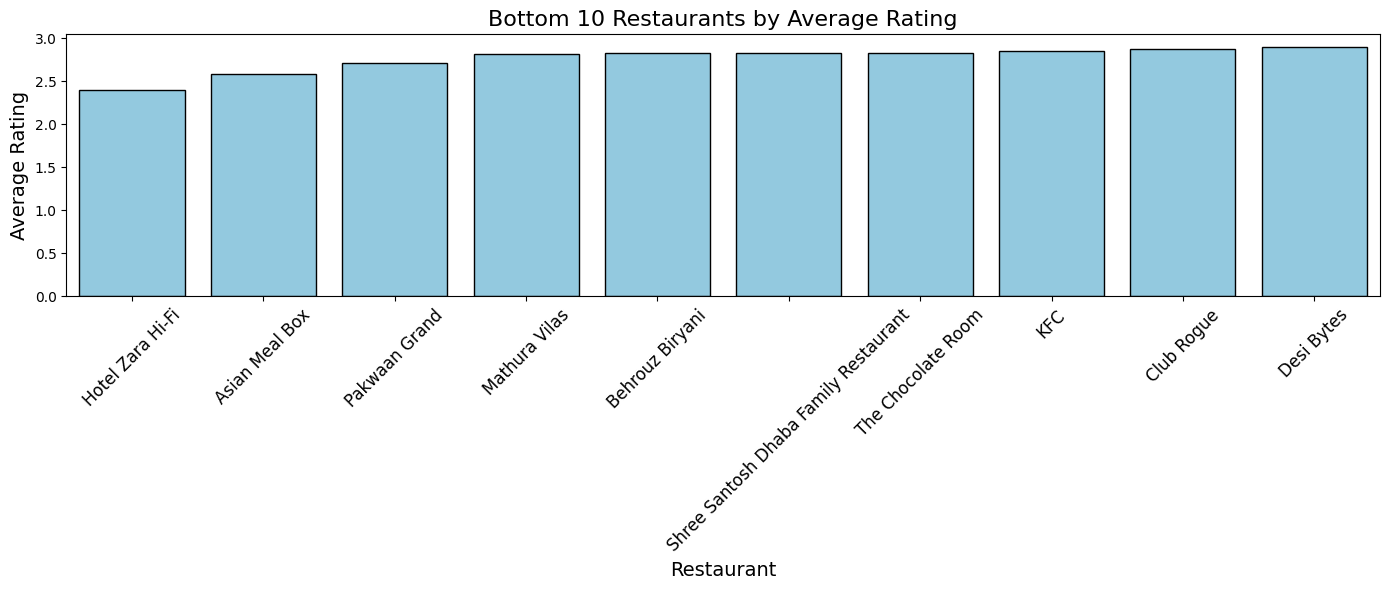

In [261]:
worst_restaurants = restaurant_ratings.sort_values(by='Average_Rating', ascending=True).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x='Restaurant', y='Average_Rating', data=worst_restaurants, color='skyblue', edgecolor='black')
plt.title('Bottom 10 Restaurants by Average Rating', fontsize=16)
plt.ylabel('Average Rating', fontsize=14)
plt.xlabel('Restaurant', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()
